<a href="https://colab.research.google.com/github/Hadiqapieas/Leukemia-Data-classification/blob/ResNet152/ResNet152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip Original.zip

Archive:  Original.zip
   creating: Pro/
  inflating: Pro/WBC-Malignant-Pro-001.jpg  
  inflating: Pro/WBC-Malignant-Pro-002.jpg  
  inflating: Pro/WBC-Malignant-Pro-003.jpg  
  inflating: Pro/WBC-Malignant-Pro-004.jpg  
  inflating: Pro/WBC-Malignant-Pro-005.jpg  
  inflating: Pro/WBC-Malignant-Pro-006.jpg  
  inflating: Pro/WBC-Malignant-Pro-007.jpg  
  inflating: Pro/WBC-Malignant-Pro-008.jpg  
  inflating: Pro/WBC-Malignant-Pro-009.jpg  
  inflating: Pro/WBC-Malignant-Pro-010.jpg  
  inflating: Pro/WBC-Malignant-Pro-011.jpg  
  inflating: Pro/WBC-Malignant-Pro-012.jpg  
  inflating: Pro/WBC-Malignant-Pro-013.jpg  
  inflating: Pro/WBC-Malignant-Pro-014.jpg  
  inflating: Pro/WBC-Malignant-Pro-015.jpg  
  inflating: Pro/WBC-Malignant-Pro-016.jpg  
  inflating: Pro/WBC-Malignant-Pro-017.jpg  
  inflating: Pro/WBC-Malignant-Pro-018.jpg  
  inflating: Pro/WBC-Malignant-Pro-019.jpg  
  inflating: Pro/WBC-Malignant-Pro-020.jpg  
  inflating: Pro/WBC-Malignant-Pro-021.jpg  
  inflating: P

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score

# Defining paths to dataset directories
dataset_dir = 'Original'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')

# Creating the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Moving images from early, pre, and pro directories to malignant directory
for stage in ['Early', 'Pre', 'Pro']:
    stage_dir = os.path.join(dataset_dir, stage)
    if os.path.exists(stage_dir):
        for img_file in os.listdir(stage_dir):
            img_path = os.path.join(stage_dir, img_file)
            shutil.move(img_path, malignant_dir)
        os.rmdir(stage_dir)  # Remove the empty directory
# Defining paths to your dataset directories
dataset_dir = '/content'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')  # Create this directory if it doesn't exist

# Creating the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Defining paths for stages that need to be moved to Malignant
stages = ['Early', 'Pre', 'Pro']

# Moving images from early, pre, and pro directories to malignant directory
for stage in stages:
    stage_dir = os.path.join(dataset_dir, stage)
    if os.path.exists(stage_dir):
        for img_file in os.listdir(stage_dir):
            img_path = os.path.join(stage_dir, img_file)
            shutil.move(img_path, malignant_dir)
        os.rmdir(stage_dir)  # Remove the empty directory
    else:
        print(f"Directory {stage_dir} does not exist.")
        # List contents of the 'content' directory
!ls /content
# List files in Benign and Malignant directories
!ls /content/Benign
!ls /Original/Malignant
# Defining paths for new dataset splits
train_dir = '/content/train_dataset'
val_dir = '/content/validation_dataset'
test_dir = '/content/test_dataset'

# Creating directories for dataset splits
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)
    for category in ['Benign', 'Malignant']:
        os.makedirs(os.path.join(directory, category), exist_ok=True)

# Spliting dataset and copy images
for category_dir, category in [(benign_dir, 'Benign'), (malignant_dir, 'Malignant')]:
    if os.path.exists(category_dir):  # Ensure directory exists
        image_files = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]
        train_files, test_val_files = train_test_split(image_files, test_size=0.3, random_state=42)
        val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

        for file in train_files:
            shutil.copy(file, os.path.join(train_dir, category))
        for file in val_files:
            shutil.copy(file, os.path.join(val_dir, category))
        for file in test_files:
            shutil.copy(file, os.path.join(test_dir, category))
    else:
      print(f"Directory {category_dir} does not exist.")



Benign	Malignant  Original  Original.zip  sample_data
WBC-Benign-001.jpg  WBC-Benign-102.jpg	WBC-Benign-203.jpg  WBC-Benign-304.jpg	WBC-Benign-405.jpg
WBC-Benign-002.jpg  WBC-Benign-103.jpg	WBC-Benign-204.jpg  WBC-Benign-305.jpg	WBC-Benign-406.jpg
WBC-Benign-003.jpg  WBC-Benign-104.jpg	WBC-Benign-205.jpg  WBC-Benign-306.jpg	WBC-Benign-407.jpg
WBC-Benign-004.jpg  WBC-Benign-105.jpg	WBC-Benign-206.jpg  WBC-Benign-307.jpg	WBC-Benign-408.jpg
WBC-Benign-005.jpg  WBC-Benign-106.jpg	WBC-Benign-207.jpg  WBC-Benign-308.jpg	WBC-Benign-409.jpg
WBC-Benign-006.jpg  WBC-Benign-107.jpg	WBC-Benign-208.jpg  WBC-Benign-309.jpg	WBC-Benign-410.jpg
WBC-Benign-007.jpg  WBC-Benign-108.jpg	WBC-Benign-209.jpg  WBC-Benign-310.jpg	WBC-Benign-411.jpg
WBC-Benign-008.jpg  WBC-Benign-109.jpg	WBC-Benign-210.jpg  WBC-Benign-311.jpg	WBC-Benign-412.jpg
WBC-Benign-009.jpg  WBC-Benign-110.jpg	WBC-Benign-211.jpg  WBC-Benign-312.jpg	WBC-Benign-413.jpg
WBC-Benign-010.jpg  WBC-Benign-111.jpg	WBC-Benign-212.jpg  WBC-Benign-313

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(dataset_dir, f'{x}_dataset' if x != 'val' else 'validation_dataset'), data_transforms[x])
                  for x in ['train', 'val', 'test']}


# Create DataLoaders
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4)
               for x in ['train', 'val', 'test']}

# Define the dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
print(f"Train size: {dataset_sizes['train']}, Val size: {dataset_sizes['val']}, Test size: {dataset_sizes['test']}")
import torch

# Specify the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")


Train size: 2278, Val size: 489, Test size: 489
Device: cuda:0


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [4]:
# Load a pre-trained ResNet-152 model and modify it for our use case
model = torchvision.models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Assuming binary classification (Benign and Malignant)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training function
import copy

def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_acc_history.append(epoch_acc)
            else:
                val_acc_history.append(epoch_acc)

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Best val Acc: {best_acc:4f}')
    model.load_state_dict(best_model_wts)
    return model, train_acc_history, val_acc_history

# Training the model
model, train_acc_history, val_acc_history = train_model(model, dataloaders, criterion, optimizer, num_epochs=25)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:01<00:00, 170MB/s]


Epoch 0/24
----------
train Loss: 0.2398 Acc: 0.9122
val Loss: 0.1084 Acc: 0.9714
Epoch 1/24
----------
train Loss: 0.0609 Acc: 0.9798
val Loss: 0.0336 Acc: 0.9918
Epoch 2/24
----------
train Loss: 0.0461 Acc: 0.9842
val Loss: 0.0243 Acc: 0.9939
Epoch 3/24
----------
train Loss: 0.0233 Acc: 0.9925
val Loss: 0.0138 Acc: 0.9959
Epoch 4/24
----------
train Loss: 0.0227 Acc: 0.9917
val Loss: 0.0152 Acc: 0.9980
Epoch 5/24
----------
train Loss: 0.0237 Acc: 0.9921
val Loss: 0.0124 Acc: 0.9959
Epoch 6/24
----------
train Loss: 0.0233 Acc: 0.9939
val Loss: 0.0099 Acc: 0.9959
Epoch 7/24
----------
train Loss: 0.0111 Acc: 0.9974
val Loss: 0.0130 Acc: 0.9939
Epoch 8/24
----------
train Loss: 0.0143 Acc: 0.9960
val Loss: 0.0182 Acc: 0.9918
Epoch 9/24
----------
train Loss: 0.0106 Acc: 0.9969
val Loss: 0.0047 Acc: 0.9980
Epoch 10/24
----------
train Loss: 0.0179 Acc: 0.9947
val Loss: 0.0032 Acc: 1.0000
Epoch 11/24
----------
train Loss: 0.0119 Acc: 0.9965
val Loss: 0.0057 Acc: 1.0000
Epoch 12/24
--

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluating on the test dataset
#evaluate_model(model, dataloaders['test'], device)
def evaluate_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (preds == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    accuracy = correct / total
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

    # Generating the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 7))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataloader.dataset.classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Generating the classification report
    class_report = classification_report(all_labels, all_preds, target_names=dataloader.dataset.classes)
    print("Classification Report:")
    print(class_report)


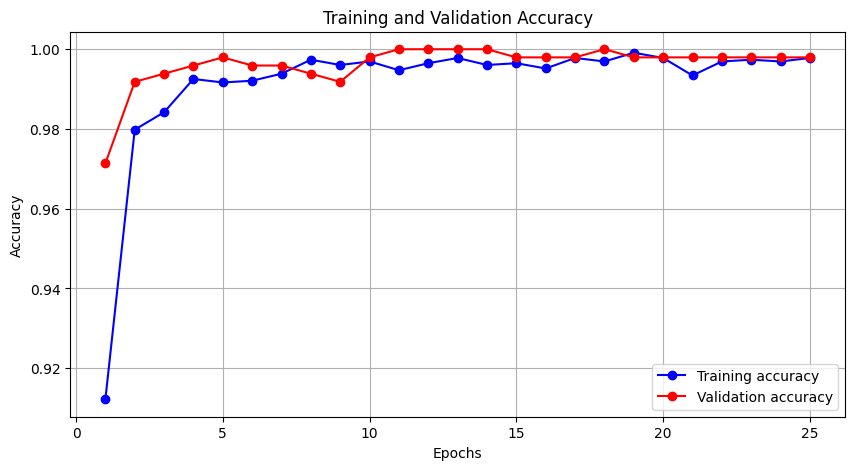

In [8]:
# Plot training and validation accuracy
def plot_training_results(train_acc_history, val_acc_history):
    train_acc_history = [x.cpu().numpy() for x in train_acc_history]
    val_acc_history = [x.cpu().numpy() for x in val_acc_history]

    epochs = range(1, len(train_acc_history) + 1)

    plt.figure(figsize=(10, 5))

    # Plot training and validation accuracy
    plt.plot(epochs, train_acc_history, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc_history, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Plot the results
plot_training_results(train_acc_history, val_acc_history)

